# Data Mining (2CSDE71)
## Name :- Harsh Pansuriya
## Roll No. :- 21BCE176
## Date :- 16th February, 2024
## Prac. No :- 4

>Aim :- Consider the data set of practical-1. Implement a menu driven program
for finding following functions.
>1. Calculate the mean, median, and mode of the dataset.
>2. Determine the range of the data.
>3. Computing the five-number summary, including the minimum,
first quartile, median, third quartile, and maximum, also show
that given data is symmetric, positively skewed or negatively
skewed distribution.
>4. Create a box plot based on the five-number summary. Provide an
interpretation of the key components of the box plot.
>5. Identify and discuss any potential outliers in the dataset.
>
>Apply your knowledge of central tendency, data dispersion, and
visualization techniques to analyse a dataset without specifying the
context.

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [2]:
# Assuming the data is in a CSV file (adjust if needed)
dataset = pd.read_csv("/Users/harsh/Documents/DM/Database/hr_ds.csv")

# Selecting the desired columns
selected_data = dataset[["Salary", "EngagementSurvey", "Absences"]]

# Rename the 'EngagementSurvey' column to 'EngagementScore'
selected_data = selected_data.rename(columns={'EngagementSurvey': 'EngagementScore'})


1. Calculate the mean, median, and mode of the dataset.

In [3]:
def calc_mean_median_mode(data):
    means = data.mean()
    medians = data.median()
    modes = data.mode().iloc[0]
    return means,medians,modes

2. Determine the range of the data.

In [4]:
def calculate_range(data):
    return data.max() - data.min()

3. Computing the five-number summary, including the minimum, first quartile, median, third quartile, and maximum, also show that given data is symmetric, positively skewed or negatively skewed distribution.

In [5]:
def compute_five_number_summary(data):
    summaries = {}
    for column in data.columns:
        minimum = data[column].min()
        maximum = data[column].max()
        first_quartile = data[column].quantile(0.25)
        median = data[column].median()
        third_quartile = data[column].quantile(0.75)

        # Determine skewness
        skewness = "Symmetric"
        if median > first_quartile and median < third_quartile:
            skewness = "Symmetric"
        elif median < first_quartile:
            skewness = "Negatively skewed"
        else:
            skewness = "Positively skewed"

        summaries[column] = {
            'Minimum': minimum,
            'First Quartile': first_quartile,
            'Median': median,
            'Third Quartile': third_quartile,
            'Maximum': maximum,
            'Skewness': skewness
        }

    return summaries

4. Create a box plot based on the five-number summary. Provide an interpretation of the key components of the box plot.

In [6]:
def create_box_plot(data):
    for column in data.columns:
        plt.boxplot(data[column].dropna())
        plt.title(f'Box plot for {column}')
        plt.show()

5. Identify and discuss any potential outliers in the dataset.

In [7]:
def identify_outliers(data):
    outliers = []
    for column in data.columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        column_outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)].tolist()
        outliers.append(column_outliers)

    return outliers

## Main menu

In [8]:
def main():
    print("1. Calculate the mean, median, and mode of the dataset.")
    print("2. Determine the range of the data.")
    print("3. Computing the five-number summary and skewness.")
    print("4. Create a box plot based on the five-number summary.")
    print("5. Identify potential outliers.")

    choice = input("\nEnter your choice (1/2/3/4/5): ")
    print("")
    if choice == '1':
        x = calc_mean_median_mode(selected_data)
        mean = x[0]
        median = x[1]
        mode = x[2]
        print(f"Mean:\n{mean}\n\nMedian:\n{median}\n\nMode:\n{mode}")
        
    elif choice == '2':
        data_range = calculate_range(selected_data)
        print(f"Range of the data:\n{data_range}")
        
    elif choice == '3':
        summaries = compute_five_number_summary(selected_data)
        for column, summary in summaries.items():
            print(f"Five-number summary for {column}:")
            for key, value in summary.items():
                print(f"{key}: {value}")
            print()

        
    elif choice == '4':
        create_box_plot(selected_data)
        
    elif choice == '5':
        outliers = identify_outliers(selected_data)
        outliers_with_values = [column_outliers for column_outliers in outliers if column_outliers]
        if not outliers_with_values:
            print("No outliers found.")
        else:
            print("Potential outliers:")
            for idx, column_outliers in enumerate(outliers_with_values):
                print(f"Outliers in column {selected_data.columns[idx]}: {column_outliers}")
            
    else:
        print("Invalid choice.")

if __name__ == "__main__":
    main()

1. Calculate the mean, median, and mode of the dataset.
2. Determine the range of the data.
3. Computing the five-number summary and skewness.
4. Create a box plot based on the five-number summary.
5. Identify potential outliers.



Enter your choice (1/2/3/4/5):  3



Five-number summary for Salary:
Minimum: 45046
First Quartile: 55501.5
Median: 62810.0
Third Quartile: 72036.0
Maximum: 250000
Skewness: Symmetric

Five-number summary for EngagementScore:
Minimum: 1.12
First Quartile: 3.69
Median: 4.28
Third Quartile: 4.7
Maximum: 5.0
Skewness: Symmetric

Five-number summary for Absences:
Minimum: 1
First Quartile: 5.0
Median: 10.0
Third Quartile: 15.0
Maximum: 20
Skewness: Symmetric



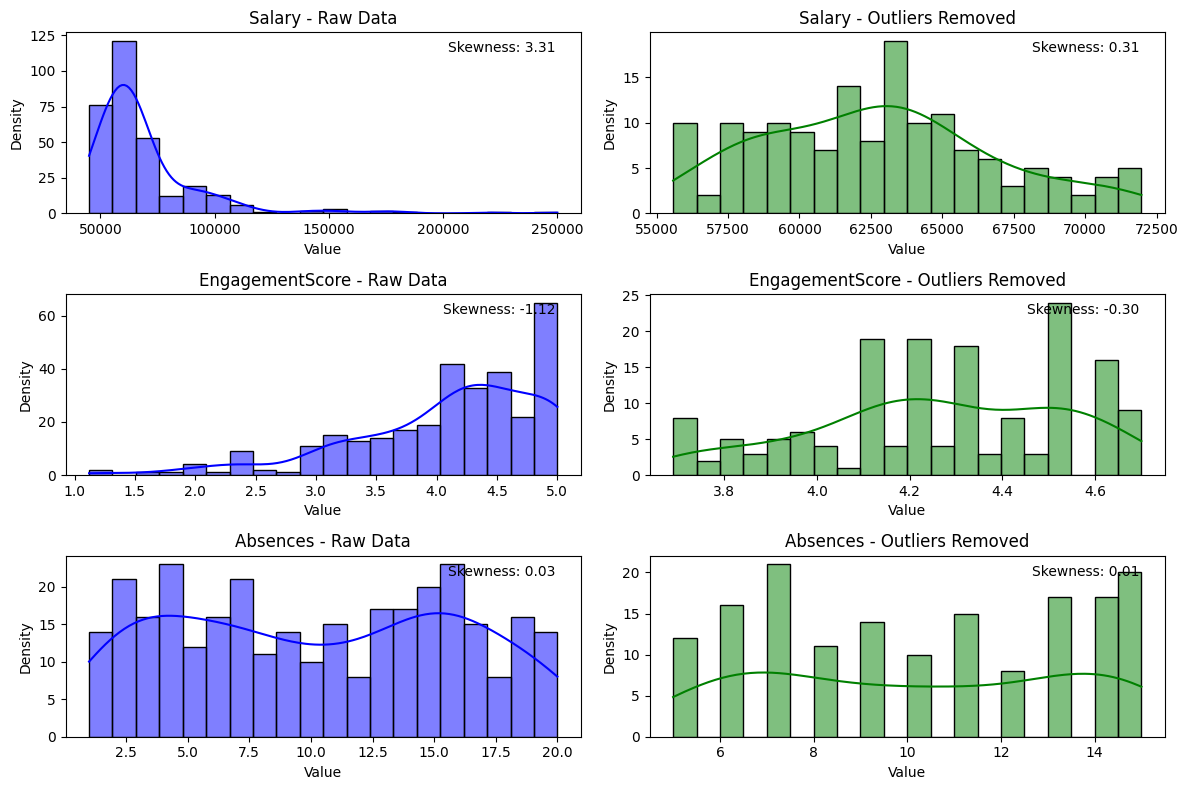

In [9]:
import seaborn as sns

def compare_histograms(data):
    fig, axs = plt.subplots(nrows=len(data.columns), ncols=2, figsize=(12, 8))

    for i, column in enumerate(data.columns):
        raw_data = data[column]
        outliers_removed = data[column][(data[column] >= data[column].quantile(0.25)) & (data[column] <= data[column].quantile(0.75))]

        sns.histplot(raw_data, bins=20, color='blue', alpha=0.5, kde=True, ax=axs[i, 0])
        axs[i, 0].set_title(f'{column} - Raw Data')
        axs[i, 0].set_xlabel('Value')
        axs[i, 0].set_ylabel('Density')

        sns.histplot(outliers_removed, bins=20, color='green', alpha=0.5, kde=True, ax=axs[i, 1])
        axs[i, 1].set_title(f'{column} - Outliers Removed')
        axs[i, 1].set_xlabel('Value')
        axs[i, 1].set_ylabel('Density')

        # Calculate skewness
        raw_skewness = raw_data.skew()
        outliers_removed_skewness = outliers_removed.skew()

        # Add skewness annotations
        axs[i, 0].annotate(f'Skewness: {raw_skewness:.2f}', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
        axs[i, 1].annotate(f'Skewness: {outliers_removed_skewness:.2f}', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

    plt.tight_layout()
    plt.show()

# Example usage:
compare_histograms(selected_data)
